# Formalia:

Please read the [assignment overview page](https://github.com/SocialComplexityLab/socialgraphs2021/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc.), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on Tuesday September 28th, 2021 at 23:59. Hand in your IPython notebook file (with extension `.ipynb`) via http://peergrade.io/

(If you haven't set up an account on peergrade yet, go to www.peergrade.io/join and type in the class code: BUKAYJ.)

# Part 1: Binning degree distributions

In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

* Binning real numbers
  * Let's do a gentle start and use the `random` library to generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.


In [2]:
X = [random.gauss(2, 0.125) for _ in range(5000)]
round(np.mean(X), 3), round(np.std(X), 3)

(2.001, 0.126)

  * Now, let's use `numpy.histogram` to bin those number into 10 bins.


In [3]:
hist, bin_edges = np.histogram(X, bins=10)
hist, bin_edges

(array([  29,  172,  504,  999, 1262, 1118,  622,  226,   60,    8]),
 array([1.61405993, 1.69745231, 1.78084469, 1.86423707, 1.94762946,
        2.03102184, 2.11441422, 2.1978066 , 2.28119899, 2.36459137,
        2.44798375]))

 * What does the `numpy.histogram` function return?  

**`numpy.histogram` returns two arrays: the first one represents the count of elements in each bin, while the second one represents the edges of each bin.**

 * Do the two arrays have the same length?**  

**No, the first one has length 10, while the second one has length 11. The difference in length can be explained by the fact that there are 10 bins, with each bin having two edges, which result in a total of 11 edges.**

  * Then we use `matplotlib.pyplot.plot` to plot the binned data. 

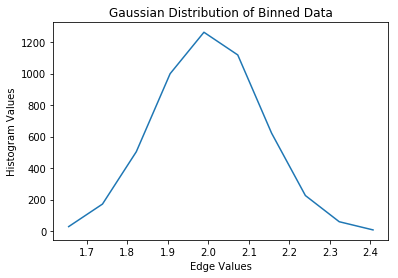

In [4]:
bin_means = [0.5*(bin_edges[i-1] + bin_edges[i]) for i in range(1, len(bin_edges)) ]
plt.plot(bin_means, hist)
plt.title("Gaussian Distribution of Binned Data")
plt.ylabel("Histogram Values")
plt.xlabel("Edge Values")
plt.show()

* You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.

**The plot above shows the shape of the Gaussian distribution. It is created from a histogram of a sample of a Guassian distribution. The problem of the different lengths of these arrays is solved by creating a list of means of each consecutive pair of bin edges. However, the `plt.plot` plot is not the best way to represent our data, as it hides the actual source of it, which are bins counts and bins edges.**

**Were we to have a bar plot, we would have adjusted that by setting the width of each plotted bar. The plot gives a correct result, because the histogram works by grouping the samples to bins, each of the same width. The `plt.bar` function draws each bar (histograms bin) centered at the middle of the bins edges.The width of a bar/bin is equal for each bar/bin and be computed as an absolute difference of any of two neighbouring bin edges.**

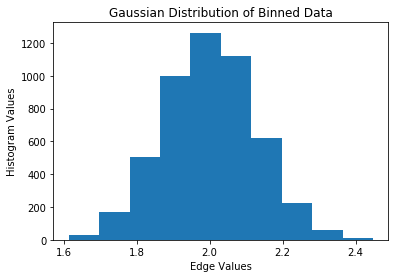

In [5]:
bin_means = [0.5*(bin_edges[i-1] + bin_edges[i]) for i in range(1, len(bin_edges)) ]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
plt.title("Gaussian Distribution of Binned Data")
plt.ylabel("Histogram Values")
plt.xlabel("Edge Values")
plt.show()

* Binning integers
  * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 


In [6]:
lam = 10
N = 5000
poisson_sample = np.random.poisson(lam=lam, size=N)

max_value = np.max(poisson_sample)
min_value = np.min(poisson_sample)
print("Minimum value: ", min_value)
print("Maximum value: ", max_value)

Minimum value:  1
Maximum value:  25


  * Instead of simplify specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number (you may want to think about how `numpy.histogram` deals with the smallest an largest value in particular; is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?). 

In [7]:
v = np.arange(min_value, max_value+1)
print("Vector: ", v)

Vector:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


* Is it correct to set the first entry of $v$ to be equal to the smallest value you observe and the last entry of $v$ to be the highest value observed?. 

**The first entry is represented by the smallest value in the above-defined vector. However, the last entry is represented by $max + 1$, to account for the number of bin edges and in order to ensure that the number of bins has the required format for `np.histogram` ("all but the last (righthand-most) bin is half-open." according to the numpy [documentation](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html)).**

* Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 

In [8]:
hist_poiss, bin_edges_poiss = np.histogram(poisson_sample, bins=v)
hist_poiss

array([  4,  14,  42,  91, 210, 292, 423, 584, 644, 605, 555, 481, 381,
       241, 164, 121,  80,  29,  17,  10,   5,   3,   1,   3])

* What is the sum over bin counts? 

**The sum over bin counts is the same as the sum of the elements in the vector bin array (ie. 5000).**

In [9]:
print("The sum over bin counts w/o bin vector:", hist.sum())
print("The sum over bin counts w/ bin vector:", hist_poiss.sum())

The sum over bin counts w/o bin vector: 5000
The sum over bin counts w/ bin vector: 5000


* Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.

**The Poisson distribution models number of 'events' occuring over a period, given the frequency of such 'event' occuring. We can use this distribution to model the number of connections in a random network. Then, the number of nodes $N$ is analogous to the period in Poisson distribution, while the probability of a connection between nodes $p$ is Poisson's rate.**

**It can be shown that the value of each bin is trully the count of this number in Poisson sample by using the `collections.Counter` class and comparing its output to  `hist_poiss` variable value. We can notice that the first element in hist_poiss variable corresponds to the minimum value of the Poisson sample, and the last elements corresponds to the maximum.**

In [10]:
from collections import Counter
counter = Counter(poisson_sample)
print ((sorted([(k, v) for k, v in counter.items()], key=lambda _tuple: _tuple[0])))

[(1, 4), (2, 14), (3, 42), (4, 91), (5, 210), (6, 292), (7, 423), (8, 584), (9, 644), (10, 605), (11, 555), (12, 481), (13, 381), (14, 241), (15, 164), (16, 121), (17, 80), (18, 29), (19, 17), (20, 10), (21, 5), (22, 3), (23, 1), (24, 2), (25, 1)]


**It can noticed that the first tuple element corresponds to the min from the Poisson distribution and that the count of the last bin corresponds to the max from the Poisson distribution.**

  * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 


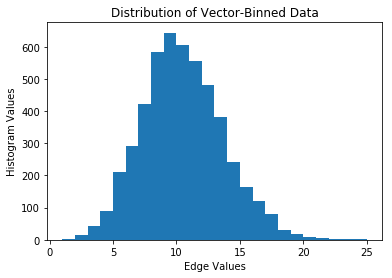

In [11]:
bin_means_poiss = [0.5 * (bin_edges_poiss[i] + bin_edges_poiss[i+1]) for i in range(len(bin_edges_poiss)-1)]
plt.bar(bin_means_poiss, hist_poiss, width=bin_edges_poiss[1] - bin_edges_poiss[0])
plt.title("Distribution of Vector-Binned Data")
plt.ylabel("Histogram Values")
plt.xlabel("Edge Values")
plt.show()


* Binning and plotting degree distributions. 
  * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
**Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.


In [12]:
avg_k = lam
p = avg_k / (N - 1)

**As indicated by the hint:** 
$$p = \frac{\langle k \rangle}{N-1}$$ 
**The formula for the average node degree follows from the fact that each connection is sampled with probability $p$ and that each node can connect to all other nodes, but not itself, hence $N-1$**


  * Now, use `networkx` to create the graph and extract the degree distribution.

In [13]:
G = nx.erdos_renyi_graph(n=N, p=p)
degrees = [v for k, v in dict(G.degree).items()]
print("The average degree is,",  np.mean(degrees), " which can be rounded up to 10.")

The average degree is, 10.0036  which can be rounded up to 10.


 * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

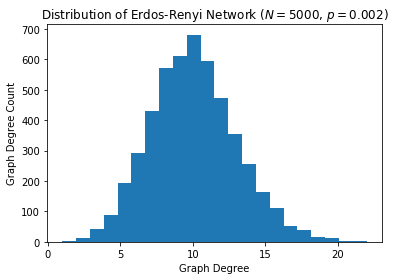

In [14]:
hist, bin_edges = np.histogram(degrees, bins=len(set(degrees)))

bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
plt.title(f"Distribution of Erdos-Renyi Network ($N={N}$, $p={round(p,3)}$)")
plt.xlabel("Graph Degree")
plt.ylabel("Graph Degree Count")
plt.show()

# Part 2: Random networks and plotting in `networkx`


In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

* In your notebook, work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
    * Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10e-3.
    * What is the expected number of links, 〈L〉?
    

**The expected number of links $\langle L \rangle$ is expressed with the followin formula:**
$$\langle L \rangle = \frac{pN(N-1)}{2}$$

**The reasoning behind it is following: each link is created with probability $p$. There are N nodes, and each can connect with N-1 other nodes. The graph is undirected, so we need divide the number of links by two to arrive at the correct amount.**

**Hence, the expected link count is:**
$$\langle L \rangle = \frac{pN(N-1)}{2} = \frac{3000(3000-1)}{2 \cdot 10^3} = 4498.5$$

* Exercise 3.1 ('Erdős-Rényi Networks'):
    * In which regime is the network?

In [16]:
p = 10e-3
N = 3000
L = p*(N)*(N-1)/2
average_degree_k = 2 * L / N 
f"{average_degree_k} = ⟨k⟩ > ln(N) = {round(math.log(N, np.e),3)}"

'29.99 = ⟨k⟩ > ln(N) = 8.006'

**It follows that $\langle k = 29.99 \rangle > ln(N) = 8.006$, hence this network is in a "fully connected regime"**.

* Exercise 3.1 ('Erdős-Rényi Networks'):
    * Calculate the degree distribution $p_k$ of this network (approximate with a Poisson degree distribution).**

**We can model $p_k$ using the Poisson distribution: $$p(k) = exp(-\langle k \rangle) \frac{\langle k \rangle^k}{k!}$$
Putting it into the code and computing the probability density we end with the following graph:**


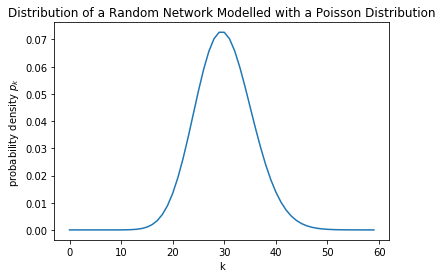

In [17]:
def poisson_distr(k):
    return np.exp(-average_degree_k) * average_degree_k ** k / math.factorial(k)
    
P = [poisson_distr(k) for k in np.arange(60)]

plt.plot(P)
plt.xlabel("k")
plt.ylabel("probability density $p_k$")
plt.title("Distribution of a Random Network Modelled with a Poisson Distribution")
plt.show()

* Exercise 3.1 ('Erdős-Rényi Networks'):
    * Calculate the probability $p_c$ so that the network is at the critical point.
    
**We use the relation between $\langle k \rangle$, $p$ and $N$:**
$$
\langle k \rangle = p \cdot (N-1)
$$
$$
p = \frac{\langle k \rangle}{N-1} 
$$

**The network is at the critical point, when it follows that:**
$$
\langle k \rangle = 1
$$

**Hence:**
$$
p_c = \frac{1}{3000-1} 
$$


In [18]:
p_c = 1 / (N-1)
round(p_c, 4)

0.0003

**The probability $p_c$ so that network is a the critical point is $p_c=0.0003$.**

* Exercise 3.1 ('Erdős-Rényi Networks'):
    * Given the linking probability $p = 10^{–3}$, calculate the number of nodes $N_{cr}$ so that the network has only one component.**  

**Taking into consideration that this is a random network modelled with probabilistic distribution, we can never be certain about a sample of the graph. In theory, it could happen that no connection is created if the probability is $p \neq 1$.**

**However, we know that a graph will most likely form a giant component, when it is in the fully connected regime, which it enters with a:**
$$
p = \frac{lnN}{N}
$$

**The condition is satisfied by $N =  9118$.**

In [19]:
f"p computed for N = 9118 yields {math.log(9118, np.e) / 9118}, which approximates to 0.001"

'p computed for N = 9118 yields 0.0010000006318023017, which approximates to 0.001'

* Exercise 3.1 ('Erdős-Rényi Networks'):
    * For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.**  


In [20]:
p = 0.001
N = 9118
k_cr = p * (N-1)
f"The average degree k is {k_cr}"

'The average degree k is 9.117'

**The average degree k is 9.117. We know, that average distance is $\langle d \rangle \approx \frac{ln(N)}{ln(k)}$, hence we have:**

In [21]:
f"⟨𝑑⟩ = {round(math.log(N, np.e) / math.log(k_cr, np.e),3)}"

'⟨𝑑⟩ = 4.126'

* Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).


In [22]:
import networkx as nx
N = 300
p=0.005

G = nx.erdos_renyi_graph(n=N, p=p)
k = round(np.mean([d for _, d in G.degree()]),3)
k, 1.5

(1.34, 1.5)

In [23]:
def degree_to_color(degree):
    if degree < 2:
        return "#c5dff0"
    if degree < 4:
        return "#65728d"
    if degree < 6:
        return "#000000"
    else: 
        return "#ff0000"

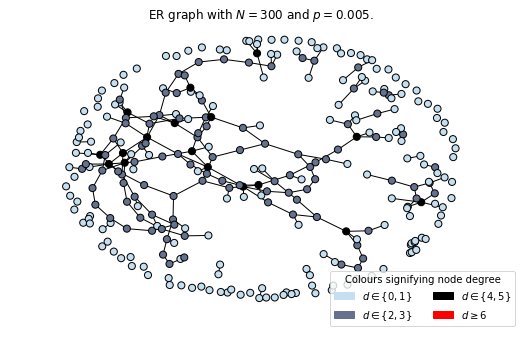

In [24]:
def plot_graph_showing_degrees(G, title="", legend_title=""):
    degree_color = [degree_to_color(d) for _id, d in G.degree()]
    nx.draw(G, pos=nx.spring_layout(G, k=0.3, iterations=150), with_labels=False, node_size=50, node_color=degree_color)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000") 


    import matplotlib.patches as mpatches

    patch1 = mpatches.Patch(color="#c5dff0", label='$d \in \{0, 1\}$')
    patch2 = mpatches.Patch(color="#65728d", label='$d \in \{2, 3\}$')
    patch3 = mpatches.Patch(color="#000000", label='$d \in \{4, 5\}$')
    patch4 = mpatches.Patch(color="#ff0000", label='$d \geq 6$')

    plt.legend(handles=[patch1, patch2, patch3, patch4], title=legend_title, loc='right', bbox_to_anchor=(1.1, 0.05),
          ncol=2, fancybox=True)
    plt.title(title)
    plt.show()
plot_graph_showing_degrees(G, "ER graph with $N=300$ and $p=0.005$.", "Colours signifying node degree")

  * Extract the Giant Connected Component, GCC. (Hint. You can use `networkx.connected_component_subgraphs`)


In [25]:
C = nx.connected_components(G)
largest_component = None
largest_size = 0
for c in C:
    if len(c) > largest_size:
        largest_size = len(c)
        largest_component = G.subgraph(c).copy()

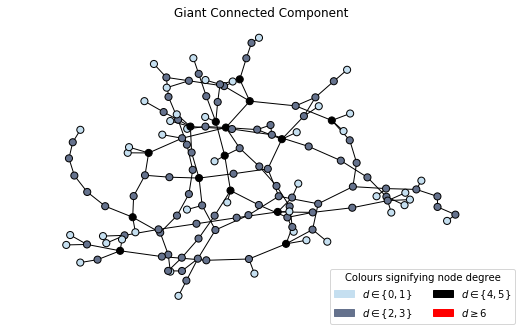

In [26]:
plot_graph_showing_degrees(largest_component, "Giant Connected Component", "Colours signifying node degree")

  * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)


In [27]:
random_node_id = np.random.choice(largest_component.nodes())
print("Random node: ", random_node_id)

Random node:  96


  * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
 

In [28]:
node_to_distance = nx.single_source_shortest_path_length(largest_component, source=random_node_id, cutoff=2)

nodes_with_2_steps = {node_id 
             for node_id, distance 
             in node_to_distance.items() 
             if distance == 2}
print("The nodes which are 2 steps away from the random node:", nodes_with_2_steps)

The nodes which are 2 steps away from the random node: {232, 98, 37, 111}


 * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)

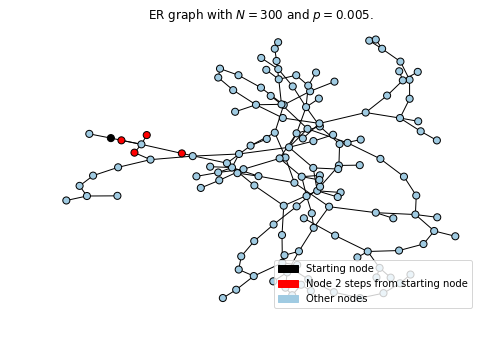

In [29]:
def node_to_color(node, node_to_distance):
    #Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2")
    if node in node_to_distance:
        if node_to_distance[node] == 0:
            return "#000000"
        if node_to_distance[node] == 2:
            return "#ff0000"
    return "#A0CBE2"
    
    

def plot_graph_showing_distances(G):
    colors = [node_to_color(n, node_to_distance) for n in  G.nodes()]

    nx.draw(G, pos=nx.spring_layout(G, k=0.3, iterations=150), with_labels=False, node_size=50, node_color=colors)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000") 


    import matplotlib.patches as mpatches

    patch1 = mpatches.Patch(color="#000000", label='Starting node')
    patch2 = mpatches.Patch(color="#ff0000", label='Node 2 steps from starting node')
    patch3 = mpatches.Patch(color="#A0CBE2", label='Other nodes')
    plt.title("ER graph with $N=300$ and $p=0.005$.")
    plt.legend(handles=[patch1, patch2, patch3], loc="lower right")
    plt.show()
plot_graph_showing_distances(largest_component)

# Part 3: Watts-Strogatz Networks


In [30]:
import networkx as nx
import matplotlib.pyplot as plt

* Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.


Average shortest path length for g1: 62.875751503006015
Average shortest path length for g2: 7.5778597194388775
Average shortest path length for g3: 4.767959919839679


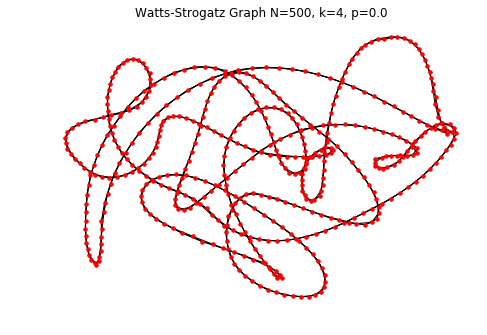

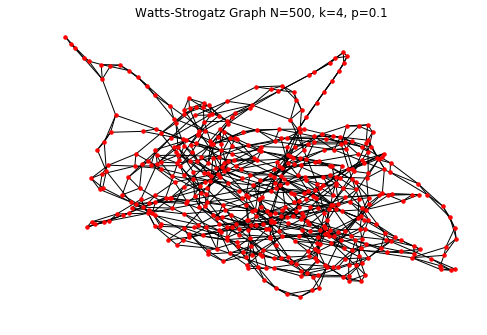

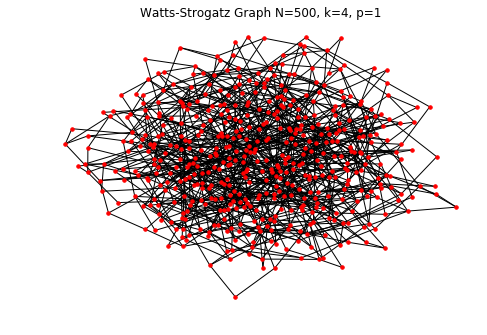

In [31]:
# create 3 small world graphs
g1 = nx.watts_strogatz_graph(n=500,k=4,p=0)
g2 = nx.watts_strogatz_graph(n=500,k=4,p=0.1)
g3 = nx.watts_strogatz_graph(n=500,k=4,p=1)

# find average shortest path length of each
d1 = nx.average_shortest_path_length(g1)
print(f'Average shortest path length for g1: {d1}')
d2 = nx.average_shortest_path_length(g2)
print(f'Average shortest path length for g2: {d2}')
d3 = nx.average_shortest_path_length(g3)
print(f'Average shortest path length for g3: {d3}')
nx.draw_spring(g1,with_labels=False,node_size=12)
plt.title("Watts-Strogatz Graph N=500, k=4, p=0.0")
plt.show()
nx.draw_spring(g2,with_labels=False,node_size=12)
plt.title("Watts-Strogatz Graph N=500, k=4, p=0.1")
plt.show()
nx.draw_spring(g3,with_labels=False,node_size=12)
plt.title("Watts-Strogatz Graph N=500, k=4, p=1")
plt.show()

**$p$ signifies the probability of an edge $(u,v)$, that is in a ring of k-nearest neighbours, being replaced with a new edge $(u,w)$, where $w$ is uniformly randomly chosen among the existing nodes. So when $p=1$, that means every edge is turned into a random edge, thus making the entire network a fully random network. This can be seen in the last drawing of the network (g3).**

* Let's understand the behavior of the WS model as we increase _p_ in more detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).


![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ws.png)

In [32]:
# create 50 networks for each of probs = {0,0.01,0.03,0.05,0.1,0.2}. Each has 500 nodes and k=4.
g_list = []
avg_path_mean_list = []
avg_path_std_list = []
probs = [0,0.01,0.03,0.05,0.1,0.2]

for val in probs:
    avg_path_list = []
    for i in range(50):
        g = nx.watts_strogatz_graph(n=500, k=4, p=val)
        sp = nx.average_shortest_path_length(g)
        avg_path_list.append(sp)
    avg_path_mean_list.append(np.mean(avg_path_list))
    avg_path_std_list.append(np.std(avg_path_list))
    

print(f'Average path lengths:\n {avg_path_mean_list}')
print(f'Std of path lengths:\n {avg_path_std_list}')

KeyboardInterrupt: 

In [ ]:
plt.errorbar(probs,avg_path_mean_list,yerr=avg_path_std_list,color = "k", fmt='-h')
plt.xlabel('p')
plt.ylabel('Average shortest path length')
plt.title('Plot of average of <d> over all probabilities')
plt.show()

**In the plot above it can be seen that the path length decreases rapidly as the value of $p$ initially increases. This rapid decrease in path length happens with only a small increase in $p$. The standard deviation can be seen as errorbars in the plot (the vertical lines), showing that there is a larger deviation in the beginning which decreases as $p$ gets larger.**

# Part 4. The Barabasi-Albert Model

In [33]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

We're going to create our own Barabasi-Albert model (a special case) in a `notebook`. Follow the recipe below for success

* Create a 100 node BA network using a BA model that you've coded on your own (so don't use the built-in NetworkX function, but the one you created during week 3). And plot it using NetworkX.

**The Barabási–Albert (BA) model is an algorithm for generating random scale-free networks using a preferential attachment mechanism. The two most important characteristics of the BA networks are growth and preferential attachment, which are responsible for the emergence of scale-free networks. Preferential attachment is a probabilistic mechanism: A new node is free to connect to any node in the network, whether it is a hub or has a single link.**

In [34]:
##function used to draw a graph
def draw_graph(G, text):
    nx.draw(G, pos=nx.spring_layout(G, k=0.3, iterations=100), with_labels=False, node_size=50)
    ax = plt.gca()
    ax.collections[0].set_edgecolor("#000000") 
    plt.title(text)
    plt.show()

**Our approach for building the BA network was to add nodes in proportion to their degree, as an alternative to using the flattened list of edges. In this case, we define the probility of picking nodes using the following formula:**
$$p = \frac{\langle k\rangle} {N-1}$$

**where $\langle k \rangle$ is the average degree of the node.**

Note. Our method was checked by the TAs who approved that our solution works well.

In [35]:
##function which appends nodes to a graph proportional to their degree 
def add_node_proportionally_to_degree(G, node):    
    if len(G.nodes()) == 0:
        G.add_node(node)
        return
    
    if len(G.nodes()) == 1:
        G.add_edge(node, list(G.nodes())[0])
        return
    
    #find all the degrees of all nodes
    all_degrees = dict(G.degree()).items()
    nodes = [n for n, _ in all_degrees]
    node_degrees = [d for _, d in all_degrees]
    #find the distibution proportional to degree 
    degree_distribution = np.array(node_degrees) / np.sum(node_degrees)
    #pick node based on that distribution 
    selected_node = np.random.choice(nodes, 1, p=degree_distribution)[0]
    G.add_edge(node, selected_node)

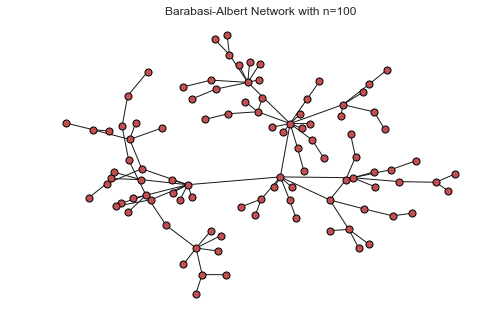

In [36]:
G = nx.Graph()

for i in range(100):
    add_node_proportionally_to_degree(G, i)

draw_graph(G, "Barabasi-Albert Network with n=100")

* Now create a 5000 node network.
  * What's the maximum and minimum degree?


In [37]:
G1 = nx.Graph()

for i in np.arange(5000):
    add_node_proportionally_to_degree(G1, i)

In [38]:
list_degrees = list(G1.degree())
all_degrees = dict(G1.degree()).items()

degree_l = []
for node, d in enumerate(list_degrees):
    degree_l.append(d)

degree_a =[j for _, j in list_degrees]
print("Minimum degree: ", np.min(degree_a))
print("Maximum degree: ", np.max(degree_a))

f'For the 5000-node BA network, the minimum degree is 1 and the maximum degree is {np.max(degree_a)}'

Minimum degree:  1
Maximum degree:  134


'For the 5000-node BA network, the minimum degree is 1 and the maximum degree is 134'

  * Now, bin the degree distribution, for example using `numpy.histogram`.


In [39]:
list_degrees = list(G1.degree())
degrees =[j for _, j in list_degrees]

hist_pois, bin_edges = np.histogram(degrees,bins=100)

x = hist_pois
y = [np.mean([bin_edges[x],bin_edges[x+1]]) for x in range(len(bin_edges)-1)]

**The distinguishing feature of the networks generated by the Barabási- Albert model is their power-law degree distribution (Barabasi, Textbook), which is by definition:**

$$p(k)≈2m^{\frac{1}{\beta k−\gamma}}$$

**where**

$$\gamma=\frac{1}{\beta}+1=3$$

  * Plot the distribution. Plot it with both linear and log-log axes.

<!-- ![Sune's version](https://raw.githubusercontent.com/suneman/socialgraphs2017/master/files/ba.png) -->

Text(0,0.5,'count')

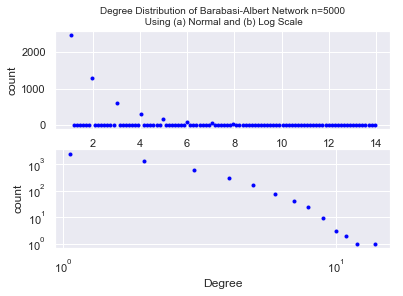

In [146]:
fig, ax = plt.subplots(2)
ax[0].set_title('Degree Distribution of Barabasi-Albert Network n=5000\n Using (a) Normal and (b) Log Scale', fontsize=10)
ax[0].scatter(y, x, marker='.', color='blue', linestyle='None')
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("count")

#ax[1].set_title('\nDegree Distribution of Barabasi-Albert Network n=5000\n Using Log Scale', fontsize=10)
ax[1].loglog(y, x, marker='.', color='blue', linestyle='None')
ax[1].set_xlabel("Degree")
ax[1].set_ylabel("count")

**As it can be noticed in the plots above, the degree distribution follows the power law distribution.**

# Part 5 Power-laws and the friendship paradox

In [41]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

Next step is to explore the [Friendship paradox](https://en.wikipedia.org/wiki/Friendship_paradox). This paradox states that _almost everyone_ have fewer friends than their friends have, on average. This sounds crazy, but is actually an almost trivial consequence of living in a social network with a power-law degree distribution. The explanation is that almost everyone is friends with a hub, that drives up the average degree of the friends. Let's explore that in the 5000 node BA network we've just generated. Do the following:

* Pick a node _i_ at random (e.g. use `random.choice`). [Find its degree](http://networkx.lanl.gov/reference/generated/networkx.Graph.degree.html).

In [42]:
G1 = nx.Graph()

for i in np.arange(5000):
    add_node_proportionally_to_degree(G1, i)
    
selected_node = np.random.choice(G1)
selected_node_degree = G1.degree(selected_node)
print("Selected node: ", selected_node)
print("Selected node's degree: ", selected_node_degree)

Selected node:  4785
Selected node's degree:  1


* Find _i_'s [neighbors](http://networkx.lanl.gov/reference/generated/networkx.Graph.neighbors.html). And calculate their average degree.

In [43]:
def test_friendship_paradox(G, should_print=False, selected_node=None):
    if selected_node is None:
        selected_node = np.random.choice(G)
    list_neigh = list(G.neighbors(selected_node))

    if should_print:
        print("Selected node's neighbors: ", list_neigh)

    neighbors_count = [G.degree(n) for n in list_neigh]
    mean_neighbor_count = np.mean(neighbors_count)
    
    if should_print:
        print("Selected node's neighbors average degrees: ", mean_neighbor_count)

    return len(list_neigh) < mean_neighbor_count

result = test_friendship_paradox(G1, should_print=True, selected_node=selected_node)

Selected node's neighbors:  [2444]
Selected node's neighbors average degrees:  2.0


* Compare the two numbers to check if it's true that _i_'s friends (on average) have more friends than _i_.

**By comparing the average of the degrees of the selected node and of the selected node's neighbors, it can be noticed that the neighbors have a higher degree than the selected node, which implies that for the given instance, i's friends (on average) have more friends than i.**

* Do this 1000 times. How many out of those 1000 times is the friendship paradox true?

In [44]:
experiment_results = [test_friendship_paradox(G1) for _ in range(1000)]
experiment_mean = np.mean(experiment_results)

print(f'The friendship paradox is true {np.sum(experiment_results)} out of 1000 attemps.')

The friendship paradox is true 862 out of 1000 attemps.


**The friendship paradox is true 862 out of 1000 attemps.**

Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment. 

* Compare to the ER network of same size and same $p$. 

### 1. BA Network without Preferential Attachemnt 
**A BA network without preferential attachemnt is expected to have a simple exponential degree distribution ($p_{k}=\frac{e}{m}*exp(\frac{-k}{m})$, with $m = \frac{k}{2}$, where $k$ is the average degree of each node in the network).**

**In order to build a BA network without preferential attachement, we pick random nodes from the graph, based on an uniform probability (which is the default probability option for 'numpy.random.choice').**

In [160]:
def add_node_no_pa(G, node):    
    if len(G.nodes()) == 0:
        G.add_node(node)
        return
    
    if len(G.nodes()) == 1:
        G.add_edge(node, list(G.nodes())[0])
        return
    
    #find all the degrees of all nodes
    all_degrees = dict(G.degree()).items()
    nodes = [n for n, _ in all_degrees]
    selected_node = np.random.choice(nodes, 1)[0]
    G.add_edge(node, selected_node)

In [161]:
G2 = nx.Graph()

for i in np.arange(5000):
    add_node_no_pa(G2, i)

### 2. ER network 
**On the other hand, an ER network is a random network which follows a Poisson distribution ($p_{poisson} = e^{ - k}\frac{ k ^k }{{k!}}$).**

**In order to build an ER with the same size $N$ and linking probability $p$ as the previous BA networks, we create a simple random graph with 5000 nodes using `gnm_random_graph`. `gnm_random_graph` generates a graph which is chosen uniformly at random from the set of all graphs with 5000 nodes and 4999 edges. The probability $p$ is by default an uniform distribution, same as for the BA without preferential attachment.**

<!-- use the following  formula for the probability:**
$$p = \frac{\langle k\rangle} {N-1}$$

**$\langle k \rangle$ is to be retrieved directly from the graph $G_1$. Likewise for the graph size $N$.**
 -->

In [176]:
G3 = nx.gnm_random_graph(5000, len(G1.edges()))

* What are the differences? Explain in your own words. 
     * Hint*: To get started, take a look at the degree distribution, and study the number of connected components.

### 3. BA Network without Preferential Attachemnt vs ER network 

Text(0,0.5,'Count')

<Figure size 360x360 with 0 Axes>

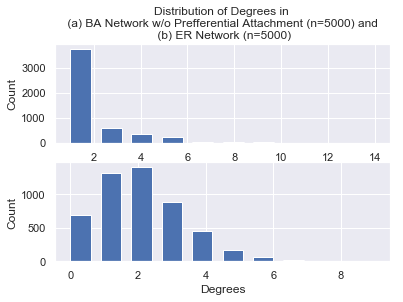

In [178]:
fig = plt.figure(figsize=(5,5))
fig, ax = plt.subplots(2)

#BA Network without Preferential Attachemnt
degrees = list(dict(G2.degree()).values())
ax[0].hist(degrees, width=0.9, align='mid')
ax[0].set_xlabel('Degrees')
ax[0].set_ylabel('Count')
ax[0].set_title("Distribution of Degrees in \n (a) BA Network w/o Prefferential Attachment (n=5000) and \n (b) ER Network (n=5000)")


##Erdos Renyi 
degrees1 = list(dict(G3.degree()).values())
ax[1].hist(degrees1, width=0.6, align='mid')
ax[1].set_xlabel('Degrees')
ax[1].set_ylabel('Count')


<!-- **For the BA network, the absence of preferential attachment leads to a growing network with a stationary but exponential degree distribution. An exponential function decays much faster than a power law, hence it does not support hubs. Therefore the lack of preferential attachment eliminates the network’s scale-free character and the hubs.**
 -->

**If we are to look at the degree distribution in terms of frequency, the following plots present a comparative overview. The following observations can be made:**

   **1. In the BA network plot, we notice that after k reaches 1, the critical point, the number of degrees of the node decreases, indicating that the number of components of the graph does not scale up. According to Section 5.7 in the textbook, our BA network follows a no-preferential or a sublinear regime, resulting in fewer hubs than in a scale-free network.**
   
   **2. In the ER network, we notice that after k reaches 1, the number of degrees of the nodes increases, indicating an increase in the number of connected components of the network. This can be explaind through the random network theory which predicts that for k>1, we should observe the evolution of a giant component.**

In [173]:
comp_g2 = len(list(nx.connected_component_subgraphs(G2)))
print("Number of connected componenets in BA network w/o prefferential attachment: ", comp_g2)
comp_g3 = len(list(nx.connected_component_subgraphs(G3)))
print("Number of connected componenets in ER network: ", comp_g3)

Number of connected componenets in BA network w/o prefferential attachment:  1
Number of connected componenets in ER network:  816


**Our observations are supported by the calculation of the number of connected components in each of the two networks. The BA network without preferential attachment, but with the growth mechanism in place, has only one giant component.  Therefore the lack of preferential attachment eliminates the network’s scale-free character and the hubs. In presence of the growth mechanism, however, the network is forced to converge to a stationary yet incomplete graph with only one component.**

**On the other hand, the random ER one has many compoentns, suggesting the fact the the ER network is in the subcritical regime and it is evolving towards the connected regime.**

**All in all, even if the BA network lacks preferential attachment, it leads to a growing network with a stationary but exponential degree distribution facilitated by the growth mechanism.**
